<a href="https://colab.research.google.com/github/GazalaSayyad/lincense-plate-detection-using-Tesseract/blob/master/linc_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U git+https://github.com/madmaze/pytesseract.git

  Cloning https://github.com/madmaze/pytesseract.git to /tmp/pip-req-build-mb269lvq
  Running command git clone -q https://github.com/madmaze/pytesseract.git /tmp/pip-req-build-mb269lvq
  Created wheel for pytesseract: filename=pytesseract-0.3.4-py2.py3-none-any.whl size=13433 sha256=9415196bd53ba02d7779c5d37be1b9769917efb1b0bd693689bc47cca7f9688b
  Stored in directory: /tmp/pip-ephem-wheel-cache-jquzxezw/wheels/be/2a/a1/a40dbc7e579dffb2be8bbc3243c491de2d132899309f008b1f
Successfully built pytesseract
  Found existing installation: pytesseract 0.3.4
    Uninstalling pytesseract-0.3.4:
      Successfully uninstalled pytesseract-0.3.4


In [0]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
import cv2
from matplotlib import pyplot as plt

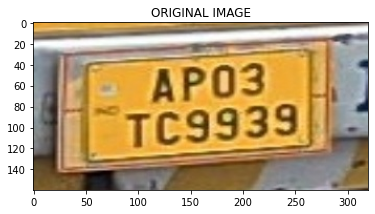

In [7]:
image = cv2.imread('AP03TC9939.jpg')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('ORIGINAL IMAGE')
plt.show()

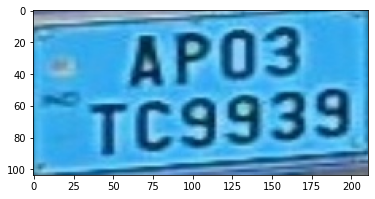

In [8]:
img = cv2.imread('AP03TC9939.jpg')
#convert my image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#perform adaptive threshold so that I can extract proper contours from the image
#need this to extract the name plate from the image. 
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
contours,h = cv2.findContours(thresh,1,2)

#once I have the contours list, i need to find the contours which form rectangles.
#the contours can be approximated to minimum polygons, polygons of size 4 are probably rectangles
largest_rectangle = [0,0]
for cnt in contours:
    approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
    if len(approx)==4: #polygons with 4 points is what I need.
        area = cv2.contourArea(cnt)
        if area > largest_rectangle[0]:
            #find the polygon which has the largest size.
            largest_rectangle = [cv2.contourArea(cnt), cnt, approx]

x,y,w,h = cv2.boundingRect(largest_rectangle[1])
#crop the rectangle to get the number plate.
roi=img[y:y+h,x:x+w]
#cv2.drawContours(img,[largest_rectangle[1]],0,(0,0,255),-1)
plt.imshow(roi, cmap = 'gray')
plt.show()

In [16]:
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
text = pytesseract.image_to_string(roi)
print (text)

————
—_APO3
=1c9933



In [17]:
custom_config = r'--oem 3 --psm 6 outputbase digits'
print(pytesseract.image_to_string(roi, config=custom_config))


————
—_APO3
=1c9933

